In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1 Spotify

- Primero puede importar todos los módulos necesarios (Python) y generar una tabla a analizar.

In [76]:
# Importamos los datos
spotify = pd.read_csv('Viz_Tarea-04/spotify.csv')

In [77]:
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


- Utilice un diagrama de dispersión basado en los valores de valencia (valence) y bailabilidad (danceability) de las canciones. Además, también puede usar la regresión lineal para encontrar su correlación.

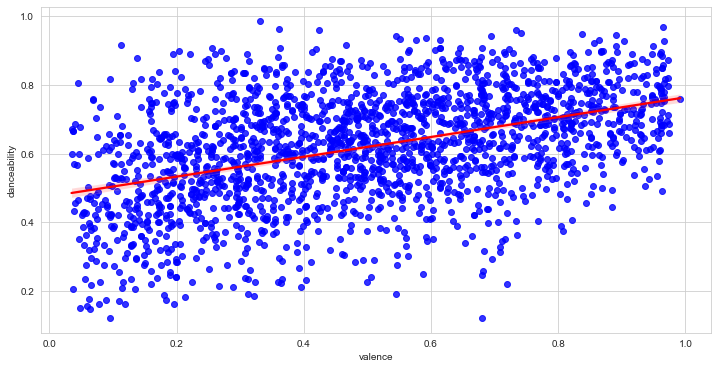

In [78]:
import seaborn as sns

ax = sns.regplot(x="valence", y="danceability", data=spotify,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.show()

- Muestre un gráfico que ilustre la distribución de las canciones en función de sus niveles de energía (energy), así como otro grafico que ilustre el número de canciones encontradas en todos los valores de valencia (valence) y bailabilidad (danceability).


De hecho fijarnos en la distribución de estas variables es muy buena para visualizar el número de canciones encontradas.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[Text(0.5, 1.0, 'Distribución por niveles de energía')]

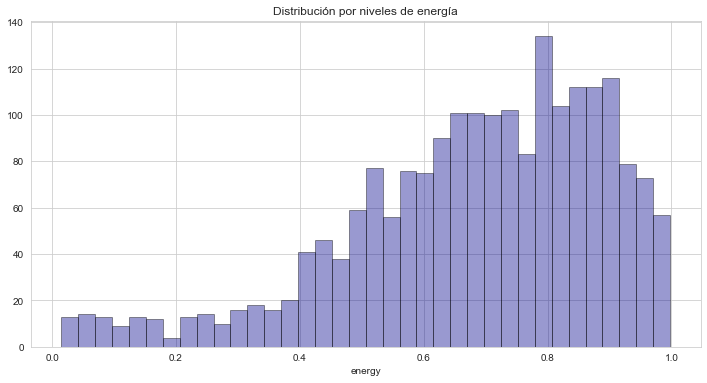

In [79]:
import seaborn as sns

sns.distplot(spotify['energy'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title='Distribución por niveles de energía')


[Text(0.5, 1.0, 'Distribución por niveles de valence')]

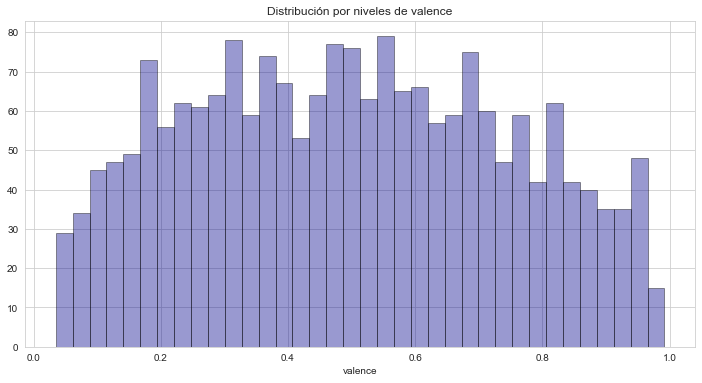

In [80]:
sns.distplot(spotify['valence'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title='Distribución por niveles de valence')

[Text(0.5, 1.0, 'Distribución por niveles de danceability')]

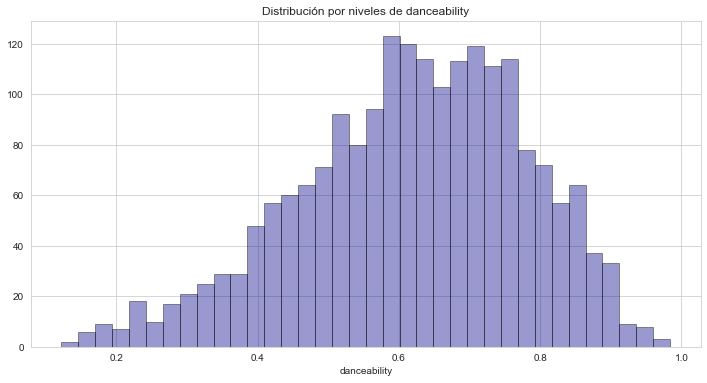

In [81]:
sns.distplot(spotify['danceability'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set(title='Distribución por niveles de danceability')

A continuación, genere una lista de rasgos "elegidos" y use el análisis de componentes principales (PCA) para reducir las dimensiones de esa lista. Cuanto menor sea la distancia entre dos canciones, mayores serán las similitudes en sus rasgos.

Para la elección de variables haré uso de un correlograma para así poder ver cuáles me podrían servir

<AxesSubplot: >

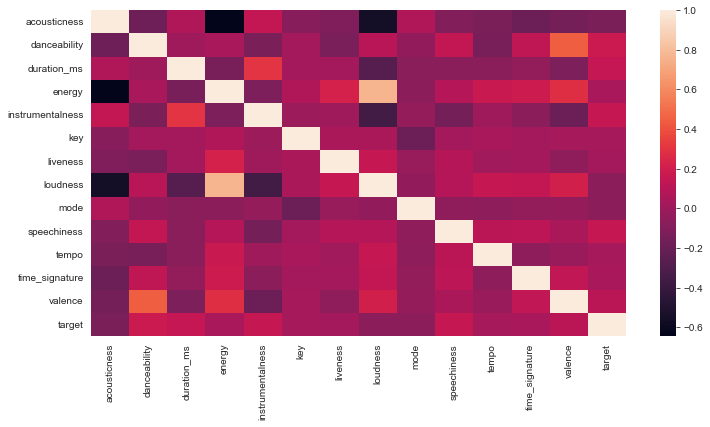

In [82]:
sns.heatmap(spotify.iloc[:,1:16].corr())

Siendo así, las variables elegidas son: 
1. loudness
2. energy
3. valence
4. danceability
5. instrumentalness
6. duration_ms
7. mode
8. time_signature
9. liveness

Ahora se implementa PCA

In [83]:
from sklearn.preprocessing import MinMaxScaler

data_choose = spotify.loc[:, ['loudness', 'energy', 'valence', 'danceability', 'instrumentalness', 'duration_ms',
                             'liveness', 'time_signature', 'mode']]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data_choose)

Para el número de componentes, me basaré en la variabilidad explicada, siendo así tenemos:

In [84]:
from sklearn.decomposition import PCA

pca_spotify = PCA(n_components = 0.95)
pca_spotify.fit(data_rescaled)
reduced = pca_spotify.transform(data_rescaled)

Donde vemos que se eligieron 6 componentes, lo vemos de la siguiente manera:

In [85]:
reduced.shape

(2017, 6)

In [86]:
reduced[:10]

array([[-0.4015085 ,  0.06826916, -0.17113477, -0.26094765, -0.14457357,
         0.2342644 ],
       [-0.39757258, -0.05766414, -0.02905461, -0.38357889,  0.05724613,
         0.07427128],
       [-0.40578029,  0.1182152 , -0.26168427, -0.24391458, -0.20314389,
         0.26634136],
       [-0.4104912 ,  0.60399476,  0.04084521, -0.20397765,  0.02977224,
        -0.06523779],
       [ 0.62980661,  0.07410805,  0.50857977, -0.121156  ,  0.37011989,
         0.12178355],
       [-0.39661592,  0.02584346, -0.18703784, -0.13134637, -0.19052683,
         0.209284  ],
       [-0.40254105,  0.07397792, -0.19500457, -0.21050312, -0.04680352,
         0.181459  ],
       [ 0.59372001,  0.68871138,  0.14320048, -0.09048185,  0.26158046,
        -0.24529075],
       [ 0.6182295 , -0.11829022, -0.15776929,  0.28754506, -0.02499702,
         0.08898849],
       [-0.38755129, -0.07225961, -0.10830472,  0.00697176,  0.11412971,
         0.48114717]])

También para ver de una manera más general qué tantos componentes nos es conveniente, podemos hacer una gráfica:

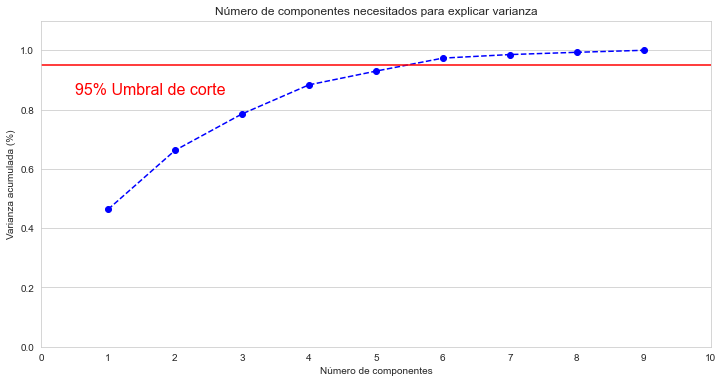

In [87]:
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Número de componentes')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Varianza acumulada (%)')
plt.title('Número de componentes necesitados para explicar varianza')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% Umbral de corte', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

- Use una lista "elegida" más pequeña y PCA para generar un gráfico de dos dimensiones.

Ahora usaré las primeras 6 variables que una vez ya elegí

In [88]:
data_choose = spotify.loc[:, ['loudness', 'energy', 'valence', 'danceability', 'instrumentalness', 'duration_ms']]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data_choose)

pca_spotify = PCA(n_components = 2)
pca_spotify.fit(data_rescaled)
reduced = pca_spotify.transform(data_rescaled)

In [89]:
reduced[:7]

array([[ 0.07964591, -0.19777374],
       [-0.04710432, -0.06108042],
       [ 0.12997017, -0.28769314],
       [ 0.61470174,  0.01490732],
       [ 0.05753742,  0.53913709],
       [ 0.03712891, -0.20941319],
       [ 0.08583355, -0.21930099]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

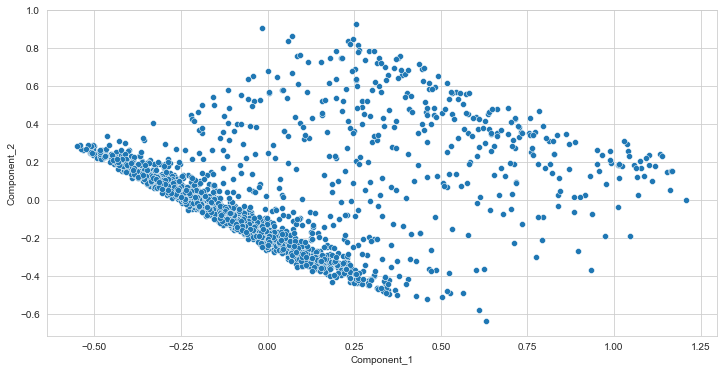

In [90]:
df_scatter = pd.DataFrame(reduced, columns=["Component_1", "Component_2"])

sns.scatterplot(df_scatter["Component_1"], df_scatter["Component_2"]).plot()

- Por último, genere un gráfico similar usando t-SNE y otra lista "elegida" en su lugar.


In [91]:
from sklearn.manifold import TSNE

data_choose = spotify.loc[:, ['loudness', 'valence', 'danceability', 'instrumentalness', 'duration_ms',
                             'liveness', 'mode']]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data_choose)

X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(data_rescaled)

In [92]:
X_embedded[:7]

array([[-41.57463 ,  63.49827 ],
       [-74.45019 ,  31.853321],
       [-37.268494,  65.31839 ],
       [ 31.894968,  70.91085 ],
       [ 83.82638 , -46.149117],
       [-34.09013 ,  60.843525],
       [-42.919132,  61.857605]], dtype=float32)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

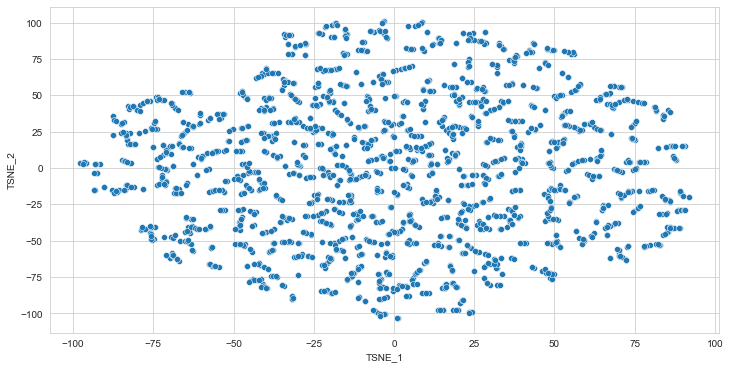

In [93]:
df_scatter = pd.DataFrame(X_embedded, columns=["TSNE_1", "TSNE_2"])

sns.scatterplot(df_scatter["TSNE_1"], df_scatter["TSNE_2"]).plot()

#### Notaciones
A diferencia de usar PCA, vemos que además de los rangos que valores varían, tenemos un comportamiento más "concentrado" en nuestros datos, siendo así que no hay un compartamiento que permita ver algún tipo de relación entre componentes o variables, en el caso de PCA sí se notan un poco de relación relación, al menos con pendiente negativa.

# Actividad 2 Cáncer
- Muestre una gráfica que indique cuántos casos son benignos (B) y malignos (M)

In [94]:
cancer = pd.read_csv('Viz_Tarea-04/cancer.csv')

In [95]:
cancer_count = cancer.groupby(pd.Grouper(key='diagnosis')).count().iloc[:,1]
cancer_count = cancer_count.reset_index()

<AxesSubplot: xlabel='diagnosis', ylabel='Count'>

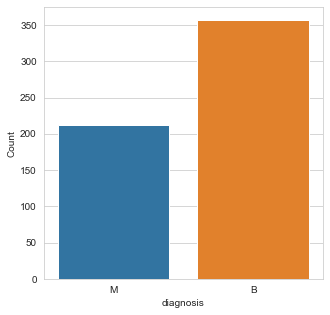

In [96]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(5, 5))
cancer_count = cancer.groupby(pd.Grouper(key='diagnosis')).count().iloc[:,1]
cancer_count = cancer_count.reset_index()
cancer_count = cancer_count.rename(columns={'radius_mean': 'Count'})

sns.barplot(x='diagnosis', y='Count', data=cancer_count)

#### Interpretación
A partir de esta gráfica podemos ver que hay más casos Benignos que Malignos; otra forma de decirlo, en su mayoría los pacientes con cáncer son Benignos, es decir que son los "menos" agresivos.

- Puede convertir el diagnóstico en un número (0 o 1) para facilitar el trabajo. Por ejemplo, para benignos: 0, malignos: 1.

- Realice una búsqueda de correlaciones de acuerdo a los datos “mean”, “SE”, “worst”.

<AxesSubplot: >

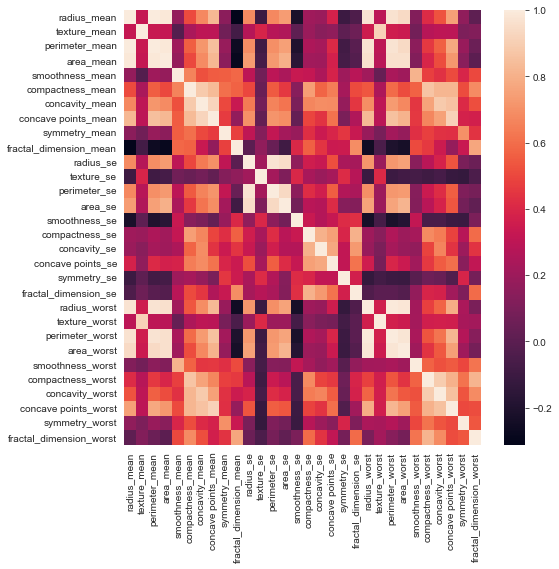

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cancer.iloc[:,2:32].corr())

Se puede apreciar que en efecto hay variables que en efecto están muy correlacionadas, en específico lo puedo ver de las variables area_worst con radius_mean, perimeter_worst con radius_mean, radius_worst con radius_mean, además perimeter_mean con area_worst entre otras combinaciones. 

Sin embargo, en términos generales, se puede apreciar una correlación "alta" entre la mayoría de las variables involucradas.

- También realice busqueda de correlaciones de acuerdo a características.

Para características, se aplicaría el mismo heatmap.

<AxesSubplot: >

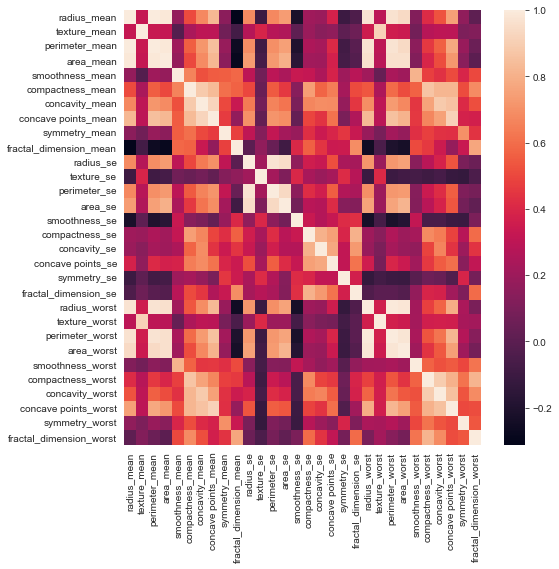

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cancer.iloc[:,1:32].corr())

A partir de las correlaciones observadas, intente eliminar alguna de las características para ver si afecta a la clasificación. En caso de no afectar, sería positivo eliminarlas, ya que reduce el número de características a tratar, lo que es beneficioso de cara al coste computacional. Por ejemplo: radio ( ), perímetro ( ) y área (   ), Concavidad (Concavity), puntos cóncavos (c ) y compacidad ( ).

A partir de las correlaciones observadas, me quedaré con las siguientes características:
- radius
- area
- perimeter 
- texture
- concavity


- Muestre un análisis de PCA y t-SNE que indique los casos benignos (B) y malignos (M).

In [99]:
categories = ['radius', 'texture', 'concavity', 'area', 'perimeter']
columns_cancer = []

for i in cancer.iloc[:,2:32].columns:
    to_split_var = i.split('_')
    if to_split_var[0] in categories:
        columns_cancer.append(i)
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

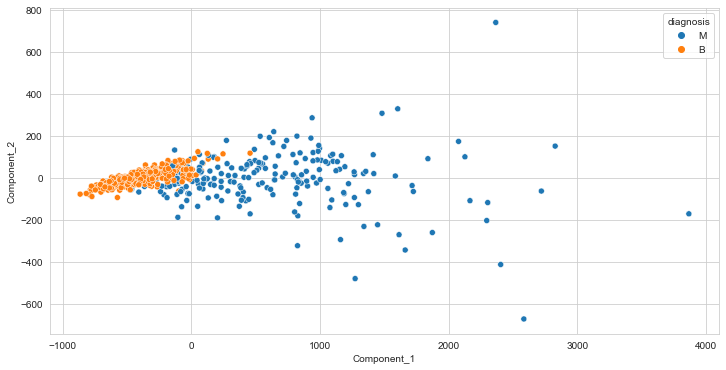

In [100]:
import plotly.express as px

data_choose = cancer.loc[:, columns_cancer]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data_choose)

pca = PCA(n_components=2)
components = pca.fit_transform(data_choose)
df_scatter = pd.DataFrame(components, columns=["Component_1", "Component_2"])

sns.scatterplot(df_scatter["Component_1"], df_scatter["Component_2"], hue=cancer['diagnosis']).plot()

Ahora el plot con TSNE

In [101]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(data_rescaled)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[]

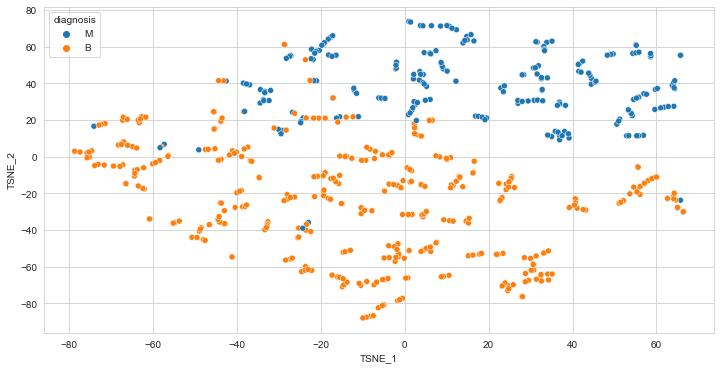

In [102]:
df_scatter = pd.DataFrame(X_embedded, columns=["TSNE_1", "TSNE_2"])

sns.scatterplot(df_scatter["TSNE_1"], df_scatter["TSNE_2"], hue=cancer['diagnosis']).plot()

#### Interpretación
Como podemos apreciar, hay una mayor separación entre puntos en la separación por TSNE, por lo que aquí podríamos definir una mejor clasificación entre casos, provocando menos "errores" en la clasificación, por ejemplo, clasificar como Maligno a un Benigno

# Actividad 3
- Muestre una ecualización de histograma de la imagen unam.png para mejorar el contraste, es decir, modificar las intensidades de pixel.
- Describa brevemente si hay diferencias con respecto a la imagen original tomando en cuenta el contraste.

Pongamos en conjunto la imagen sin ecualizar y la ecualizado para que nos sea más fácil compararlas, siendo así:

In [103]:
img = cv2.imread('Viz_Tarea-04/unam.png', 1)
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
cv2.imwrite('Viz_Tarea-04/unam_eq.png',hist_equalization_result)

True

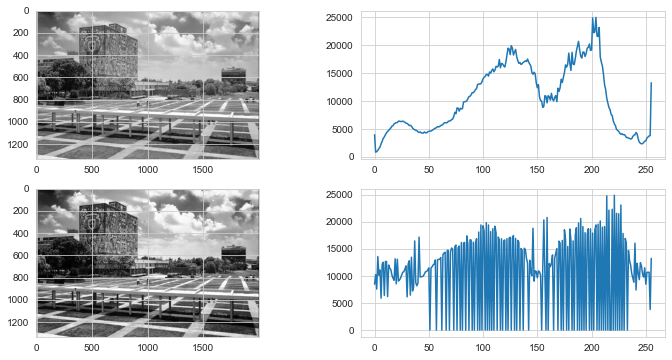

In [104]:
import cv2

img = cv2.imread('Viz_Tarea-04/unam.png',1)
img2 = cv2.imread('Viz_Tarea-04/unam_eq.png', 1)
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(img);
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img2);
plt.subplot(224),plt.plot(hist2);

Como se puede apreciar, hay diferencias tanto en los histogramas y en la imagen, se mejoró el contraste y al menos a simple vista, se ve más definida la imagen y la estructura de los caminos y la misma biblioteca. Además que en el cielo ya se notan las nubes y sus estructuras.

- Muestre tres regiones diferentes (zoom) de la imagen unam.png con tres métodos de interpolación distintos (por ejemplo, bilineal, bicubico, gaussiano, etc.).

In [113]:
img_zoom = np.copy(img)

# Coordenadas de la región a la que se quiere hacer Zoom
img_zoom1 = img[200:400, 400:650] 
img_zoom2 = img[400:1200, 1000:1800] 
img_zoom3 = img[200:600, 600:900] 

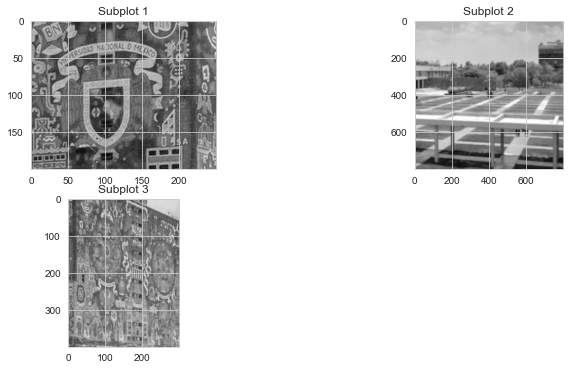

In [114]:
plt.figure()

# First subplot in the top-left position
plt.subplot(221)
plt.imshow(img_zoom1,cmap='gray',interpolation='bessel')
plt.title('Subplot 1')

# Second subplot in the top-right position
plt.subplot(222)
plt.imshow(img_zoom2,cmap='gray',interpolation='bicubic')
plt.title('Subplot 2')

# Third subplot in the bottom-left position
plt.subplot(223)
plt.imshow(img_zoom3,cmap='gray',interpolation='bilinear')
plt.title('Subplot 3')


plt.show()

#### Interpretación
Elegí estas vistas, porque me interesaba ver el escudo en el costado de la biblioteca y el mural de la parte que da hacia "Islas", por el nivel de detalle y por el mismo significado que tiene el mural, además una vista de "Islas" para poder ver el exterior de la biblioteca.

- Para cada region compare la imagen (zoom) sin interpolación con respecto a la imágenes que si están interpoladas y explique brevemente sus observaciones.

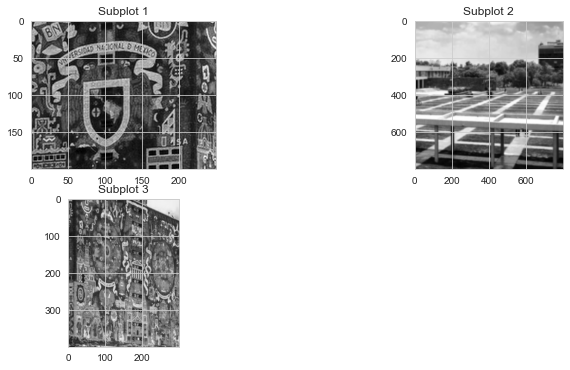

In [117]:
img_zoom = np.copy(img2)

# Coordenadas de la región a la que se quiere hacer Zoom
img_zoom1 = img_zoom[200:400, 400:650] 
img_zoom2 = img_zoom[400:1200, 1000:1800] 
img_zoom3 = img_zoom[200:600, 600:900] 

plt.figure()

# First subplot in the top-left position
plt.subplot(221)
plt.imshow(img_zoom1,cmap='gray',interpolation='bessel')
plt.title('Subplot 1')

# Second subplot in the top-right position
plt.subplot(222)
plt.imshow(img_zoom2,cmap='gray',interpolation='bicubic')
plt.title('Subplot 2')

# Third subplot in the bottom-left position
plt.subplot(223)
plt.imshow(img_zoom3,cmap='gray',interpolation='bilinear')
plt.title('Subplot 3')


plt.show()

#### Interpretación
Es una clara diferencia con el contraste, se ve más definida la imagen, por decirlo de alguna forma, sin embargo, es importante considerar el hecho de que el exterior de la biblioteca está hecho de mozaicos, por lo que algunas de estas estructuras pequeñas pueden perderse con la intensidad de colores, de esta manera tenemos que en la primer imagen con zoom hay figuras que se ven más, de una mejor manera, pero el escudo se pierde un poco, no se logran apreciar del todo las alas. En el caso del segundo tenemos que los arboles pierden alguna estructura, pero los pastos y el piso se ve mejor, se aprecia más la profundidad por el nivel de contraste. Y ahora, en el tercero es más difícil apreciar las figuras de la biblioteca a comparación de la imagen sin mejorar contraste.